In [52]:
import torch.optim as optim
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

In [53]:
torch.manual_seed(42)
num_samples = 100
sequence_length = 10
X = torch.linspace(0, 4*3.14, steps=num_samples).unsqueeze(1)
y = torch.sin(X)
print(X.shape, y.shape)

def create_seq(x, y, num_samples=num_samples):
    in_seq, out_seq = [], []
    
    for i in range(num_samples-sequence_length):
        in_seq.append(y[i:i+sequence_length])
        out_seq.append(y[i+sequence_length])
    
    in_seq = torch.stack(in_seq, dim=0)
    out_seq = torch.stack(out_seq, dim=0)
    
    return in_seq, out_seq


torch.Size([100, 1]) torch.Size([100, 1])


In [54]:
class RNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(1, 50, num_layers=1, batch_first=True)
        self.fc = nn.Linear(50, 1)
        
    def forward(self, x):
        # print(x.shape)
        output, _ = self.rnn(x)
        # print(output.shape)
        x = self.fc(output[:, -1, :])
        return x

In [63]:
x_train, y_train = create_seq(X, y)
model = RNNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    pred = model(x_train)
    # print(pred.si)
    loss = criterion(pred, y_train)
    loss.backward()
    
    optimizer.step()
    
    if epoch % 10 ==0:
        print(f"loss = {loss.item()}")

loss = 0.5645878314971924
loss = 0.26019805669784546
loss = 0.06876999884843826
loss = 0.02801656164228916
loss = 0.003969218116253614
loss = 0.00567089905962348
loss = 0.0012297665234655142
loss = 0.001319453469477594
loss = 0.001129241893067956
loss = 0.0009059033473022282


torch.Size([40, 1])


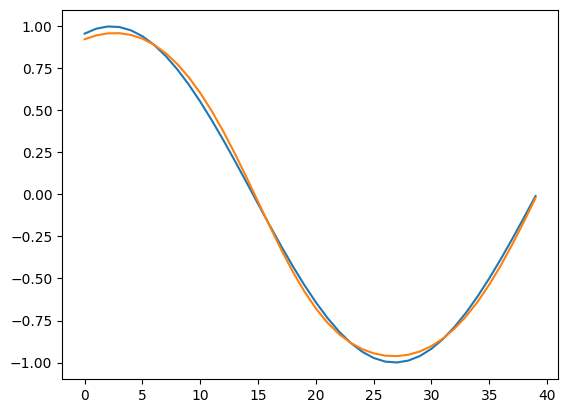

In [66]:
model.eval()
x_test = torch.linspace(4*3.14, 6*3.14, steps=50).unsqueeze(1)
y_test = torch.sin(x_test)

x_test_seq, y_test_seq = create_seq(x_test, y_test, num_samples=50)
with torch.no_grad():   
    pred_test = model(x_test_seq)
print(pred_test.shape)
plt.figure()
plt.plot(y_test[10:50])
plt.plot(pred_test)